In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def remove_noise(image):
    image_copy = image.copy()
    gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
    # Threshold the image to obtain a binary image (assuming characters are darker)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Find contours in the binary image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_contour = max(contours, key=cv2.contourArea)
    # Get the bounding box coordinates of the largest contour
    x, y, w, h = cv2.boundingRect(max_contour)
    # Create a mask with the same dimensions as the original image
    mask = np.zeros_like(binary)

    # Draw a filled rectangle corresponding to the bounding box on the mask
    cv2.rectangle(mask, (x, y), (x + w, y + h), 255, cv2.FILLED)
    # Apply the mask to the original binary image to retain only the largest contour
    filtered_image = cv2.bitwise_and(binary, mask)
    bgr_image = cv2.cvtColor(filtered_image, cv2.COLOR_GRAY2BGR)
    bgr_image[bgr_image<255]=0
    return bgr_image

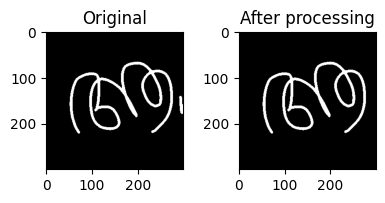

In [5]:
img_path = 'D:\Personal\zDocuments\Lachu\Project_MSc\Data\CLEANED_DATA\character_3334\character_3334_149.png'
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
b, g, r, a = cv2.split(img)
if np.all(a == 255):
    rgb_image = cv2.merge([r, g, b])
    rgb_image[rgb_image>0] = 255
    rgb_image = 255 - rgb_image
else:
    rgb_image = cv2.merge([a, a, a])    # Assign alpha values to RGB channels
    rgb_image[rgb_image<255]=0

filtered = remove_noise(rgb_image)    

# Create a figure with two subplots in a single row
plt.figure(figsize=(4, 2))  # Adjust the figure size as needed

# Plot image1 on the first subplot
plt.subplot(1, 2, 1)  # (rows, columns, index)
plt.imshow(rgb_image)
plt.title('Original')

# Plot image2 on the second subplot
plt.subplot(1, 2, 2)
plt.imshow(filtered)
plt.title('After processing')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [8]:
# # SKEW CORRECTION ALL IMAGES

# # Input and output directories
# input_folder = 'D:\Personal\zDocuments\Lachu\Project_MSc\Data\Data Dumps\PREPROCESSING\CLEANED_DATA'
# output_folder = 'D:\Personal\zDocuments\Lachu\Project_MSc\Data\Data Dumps\PREPROCESSING\FILTERED'

# # Traverse through directories and process images
# for root, dirs, files in os.walk(input_folder):
#     for subdir in dirs:
#         input_subdir = os.path.join(root, subdir)
#         output_subdir = os.path.join(output_folder, 'pre1_' + subdir)
        
#         # Create output subdirectory if it doesn't exist
#         if not os.path.exists(output_subdir):
#             os.makedirs(output_subdir)

#         # Process images in the subdirectory
#         for file in os.listdir(input_subdir):
#             if file.endswith('.png') or file.endswith('.jpg'):
#                 img_path = os.path.join(input_subdir, file)
#                 output_image_path = os.path.join(output_subdir, 'pre1_' + file)
#                 img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
#                 b, g, r, a = cv2.split(img)
#                 if np.all(a == 255):
#                     rgb_image = cv2.merge([r, g, b])
#                     rgb_image[rgb_image>0] = 255
#                     rgb_image = 255 - rgb_image
#                 else:
#                     rgb_image = cv2.merge([a, a, a])    # Assign alpha values to RGB channels
#                     rgb_image[rgb_image<255]=0

#                 # Detect and remove noise
#                 corrected_image = remove_noise(rgb_image)
#                 # Save the corrected image
#                 cv2.imwrite(output_image_path, (corrected_image).astype(np.uint8))

# print("Noise removal process completed.")

Noise removal process completed.
